In [3]:
import wandb
from fddbenchmark import FDDDataset, FDDDataloader, FDDEvaluator
from fdd_defense.attacks import FGSMAttack, PGDAttack, DeepfoolLinfAttack, NoiseAttack
from fdd_defense.models.base import BaseTorchModel
from fdd_defense.models import LinearModel
import torch. nn as nn
from torch.optim import Adam
import torch
import torch.nn.functional as F
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from fdd_defense.defenders import DistillationDefender, QuantizationDefender, AdversarialTrainingDefender

In [4]:
dataset = FDDDataset(name='small_tep')
dataset.df.head()
scaler = StandardScaler()
scaler.fit(dataset.df[dataset.train_mask])
dataset.df[:] = scaler.transform(dataset.df)

Reading data/small_tep/test_mask.csv: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 153300/153300 [00:00<00:00, 3811150.38it/s]


In [5]:
window_size = 10

fddmodel = LinearModel(
        window_size=window_size,
        step_size=1,
        num_epochs=29,
        batch_size=166,
        lr=0.004209,
    )
fddmodel.fit(dataset)

Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 3287.17it/s]


Epochs ...:   0%|          | 0/29 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 1, Loss: 1.3173


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 2, Loss: 1.0906


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 3, Loss: 1.0539


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 4, Loss: 1.0364


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 5, Loss: 1.0252


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 6, Loss: 1.0173


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 7, Loss: 1.0111


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 8, Loss: 1.0062


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 9, Loss: 1.0022


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 10, Loss: 0.9986


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 11, Loss: 0.9954


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 12, Loss: 0.9926


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 13, Loss: 0.9901


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 14, Loss: 0.9877


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 15, Loss: 0.9856


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 16, Loss: 0.9836


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 17, Loss: 0.9817


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 18, Loss: 0.9800


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 19, Loss: 0.9784


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 20, Loss: 0.9769


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 21, Loss: 0.9754


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 22, Loss: 0.9741


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 23, Loss: 0.9728


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 24, Loss: 0.9716


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 25, Loss: 0.9704


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 26, Loss: 0.9695


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 27, Loss: 0.9684


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 28, Loss: 0.9673


Steps ...:   0%|          | 0/310 [00:00<?, ?it/s]

Epoch 29, Loss: 0.9664


In [6]:
test_loader = FDDDataloader(
    dataframe=dataset.df,
    mask=dataset.test_mask,
    labels=dataset.labels,
    window_size=window_size,
    step_size=1,
)
for sample, index, label in test_loader:
    pred = fddmodel.predict(sample)
pred = pd.Series(pred, index=index, name='pred')

evaluator = FDDEvaluator(step_size=1)
evaluator.print_metrics(label, pred)

Creating sequence of samples: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 105/105 [00:00<00:00, 2820.09it/s]


FDD metrics
-----------------
TPR/FPR:
    Fault 01: 0.9822/0.0000
    Fault 02: 0.9835/0.0002
    Fault 03: 0.0048/0.0000
    Fault 04: 0.9792/0.0000
    Fault 05: 0.9807/0.0000
    Fault 06: 0.8586/0.0000
    Fault 07: 0.9990/0.0000
    Fault 08: 0.5304/0.0001
    Fault 09: 0.0000/0.0000
    Fault 10: 0.0033/0.0000
    Fault 11: 0.0008/0.0000
    Fault 12: 0.2518/0.0000
    Fault 13: 0.3577/0.0007
    Fault 14: 0.0045/0.0000
    Fault 15: 0.0000/0.0000
    Fault 16: 0.0075/0.0000
    Fault 17: 0.9419/0.0000
    Fault 18: 0.8711/0.0000
    Fault 19: 0.0180/0.0000
    Fault 20: 0.8000/0.0000
Detection TPR: 0.5638
Detection FPR: 0.0009
Average Detection Delay (ADD): 88.99
Total Correct Diagnosis Rate (Total CDR): 0.8492

Clustering metrics
-----------------
Adjusted Rand Index (ARI): 0.2473
Normalized Mutual Information (NMI): 0.6308
Unsupervised Clustering Accuracy (ACC): 0.5823


#### FPR 0.09% CDR 84%


P

In [7]:
attack = PGDAttack(model=fddmodel, eps=0.01)
for sample, index, label in test_loader:
    _sample = torch.FloatTensor(sample)
    _label = torch.LongTensor(label.values)
adv_sample = attack.attack(_sample, _label)

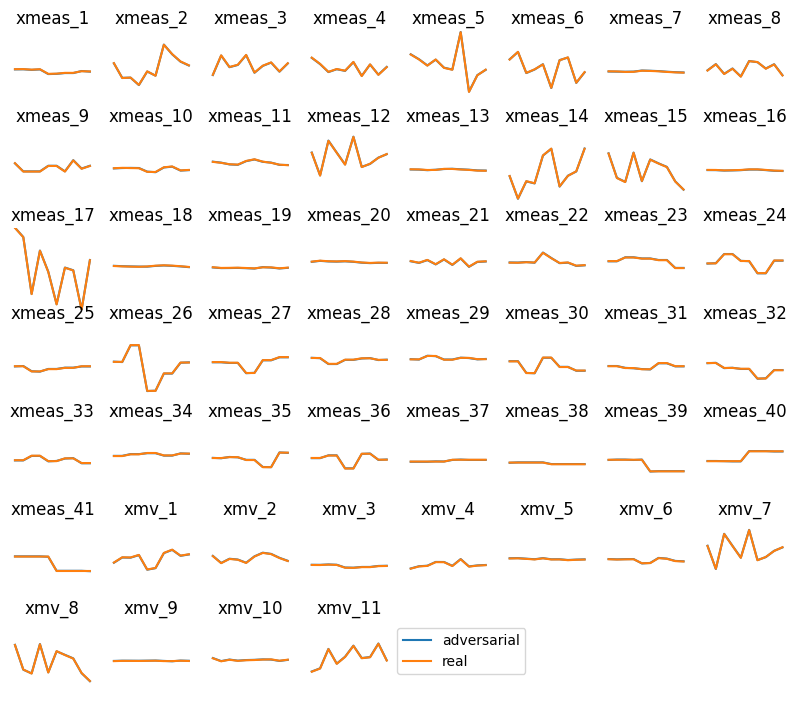

In [8]:
plt.figure(figsize=(10, 10))
for i in range(52):
    plt.subplot(8, 8, i+1)
    plt.title(dataset.df.columns[i])
    plt.plot(adv_sample.numpy()[0, :, i], label='adversarial')
    plt.plot(sample[0, :, i], label='real')
    plt.axis('off')
    plt.ylim(sample[0].min(), sample[0].max())
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [9]:
pred = fddmodel.predict(adv_sample)
pred = pd.Series(pred, index=index, name='pred')

evaluator = FDDEvaluator(step_size=1)
evaluator.print_metrics(label, pred)

FDD metrics
-----------------
TPR/FPR:
    Fault 01: 0.9607/0.0000
    Fault 02: 0.9807/0.0039
    Fault 03: 0.0000/0.0175
    Fault 04: 0.9166/0.0000
    Fault 05: 0.9642/0.0001
    Fault 06: 0.8516/0.0000
    Fault 07: 0.9985/0.0000
    Fault 08: 0.4103/0.0044
    Fault 09: 0.0000/0.0000
    Fault 10: 0.0000/0.0000
    Fault 11: 0.0000/0.0000
    Fault 12: 0.1572/0.0019
    Fault 13: 0.2736/0.0096
    Fault 14: 0.0018/0.0000
    Fault 15: 0.0000/0.0000
    Fault 16: 0.0005/0.0000
    Fault 17: 0.9317/0.0004
    Fault 18: 0.8611/0.0002
    Fault 19: 0.0038/0.0001
    Fault 20: 0.7254/0.0039
Detection TPR: 0.5597
Detection FPR: 0.0420
Average Detection Delay (ADD): 53.78
Total Correct Diagnosis Rate (Total CDR): 0.8073

Clustering metrics
-----------------
Adjusted Rand Index (ARI): 0.2268
Normalized Mutual Information (NMI): 0.5838
Unsupervised Clustering Accuracy (ACC): 0.5565


### FP от 0.04%  подскочила до 4% следовательно атака аботает